# Principal Component Analysis (PCA)
Análise dos Principais Componentes

In [1]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 

In [3]:
# Iris
iris = datasets.load_iris()

In [4]:
type(iris) # não é um dataframe

sklearn.utils.Bunch

In [5]:
X = iris['data']
y = iris['target']

In [6]:
print('Shape X:', X.shape, type(X))
print('Shape y:', y.shape, type(y))

Shape X: (150, 4) <class 'numpy.ndarray'>
Shape y: (150,) <class 'numpy.ndarray'>


In [7]:
X = StandardScaler().fit_transform(X) # normalização dos valores de iris

In [8]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
# visualizar o conjunto iris como um dataframe
pd.DataFrame(X, columns=iris['feature_names']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [11]:
# definindo o pca (quantidade de dimensoes do nosso novo conjunto de dados)
pca = PCA(n_components=2)

In [12]:
pc = pca.fit_transform(X)

In [13]:
pc.shape

(150, 2)

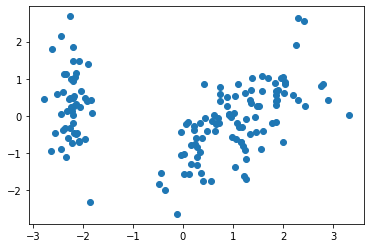

In [14]:
plt.scatter(pc[:, 0], pc[:, 1])

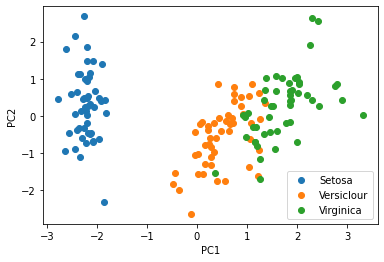

In [15]:
plt.scatter(pc[y==0, 0], pc[y==0, 1], label="Setosa")
plt.scatter(pc[y==1, 0], pc[y==1, 1], label="Versiclour")
plt.scatter(pc[y==2, 0], pc[y==2, 1], label="Virginica")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [16]:
# quanto cada componente explica o conjunto de dados
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [17]:
sum(pca.explained_variance_ratio_)

0.9581320720000164

# Dígitos

In [18]:
digitos = datasets.load_digits()
X = digitos['data']
y = digitos['target']

In [19]:
print('shape X: ', X.shape)
print('shape y: ', y.shape)

shape X:  (1797, 64)
shape y:  (1797,)


Projetando 64 dimensões em apenas duas.


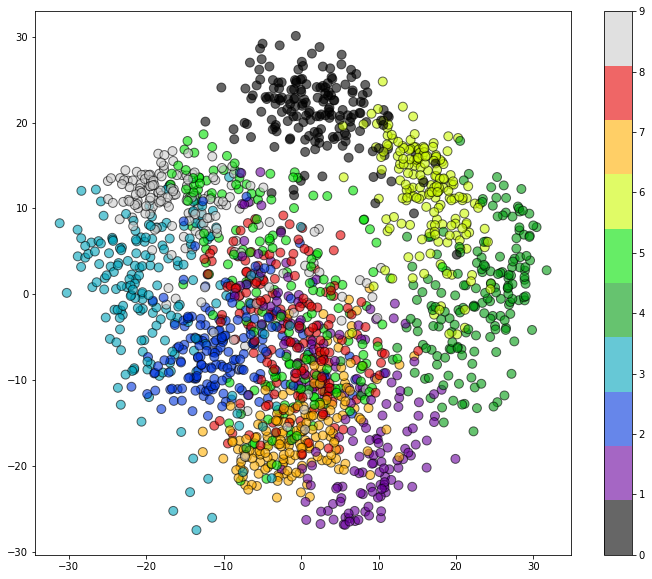

In [22]:
pca = PCA(n_components=2)
X_reduzido = pca.fit_transform(X)
# fit_transform é uma meneira de normalizar(transform) e adequar(fit) 
# no mesmo comando. Portanto, substitui o StandardScaler()

print(f'Projetando {X.shape[1]} dimensões em apenas duas.')

plt.figure(figsize=(12, 10))
plt.scatter(X_reduzido[:, 0], X_reduzido[:, 1], \
            c=y, edgecolor='black', alpha=0.6, s=80, \
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

# TSNE

Fontes:
 * http://bit.ly/2NiVYCP
 * http://bit.ly/34wZ7EO